# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# set path

In [2]:
path = r"C:\Users\solza\Downloads\12-2022 Instacart Basket Analysis"

# Import Data

In [3]:
#import data
df_complete_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
#check the output
df_complete_data.shape

(32404859, 34)

In [5]:
df_complete_data.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,3,3,12,21.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,5,4,15,28.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

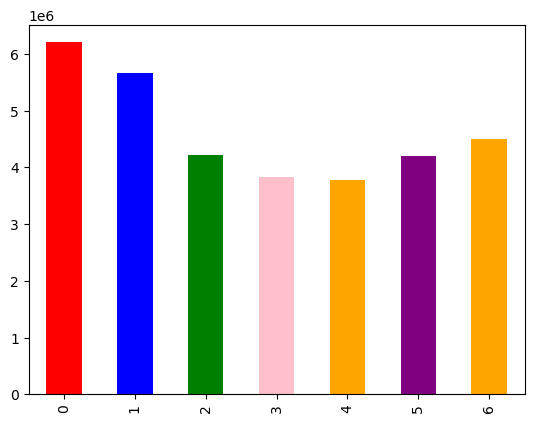

In [6]:
# bar chart
bar = df_complete_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

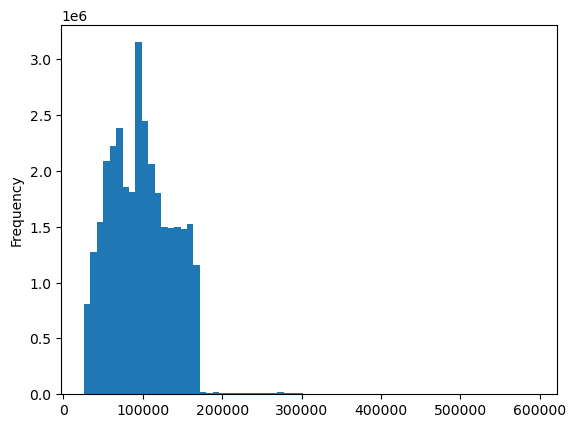

In [7]:
# histogram
hist = df_complete_data['income'].plot.hist(bins=70)

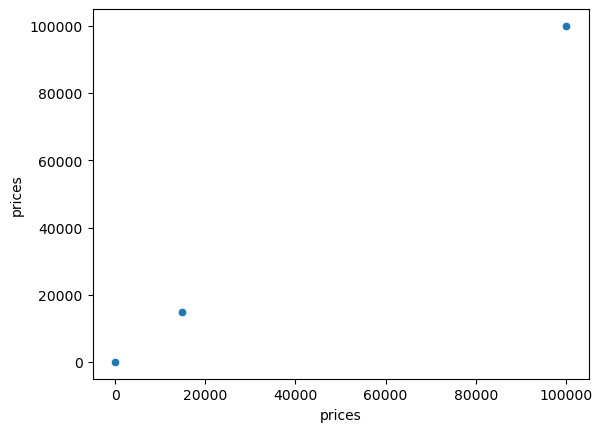

In [8]:
#scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_complete_data)

In [9]:
# line chart using subset

In [10]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_complete_data)) <= 0.7

In [11]:
# dev is the boolean list of true/false
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in data frame big
big = df_complete_data[dev]

In [13]:
# Store 30% of the sample in data frame small
small = df_complete_data[~dev]

In [14]:
# Checking length is correct
len(big)+len(small)

32404859

In [16]:
# Creating new data frame with just the columns needed for the line chart
df_small = small[['orders_day_of_week','prices']]

In [17]:
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


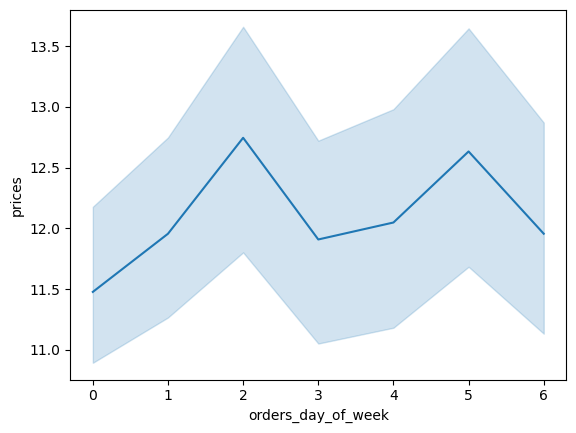

In [18]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

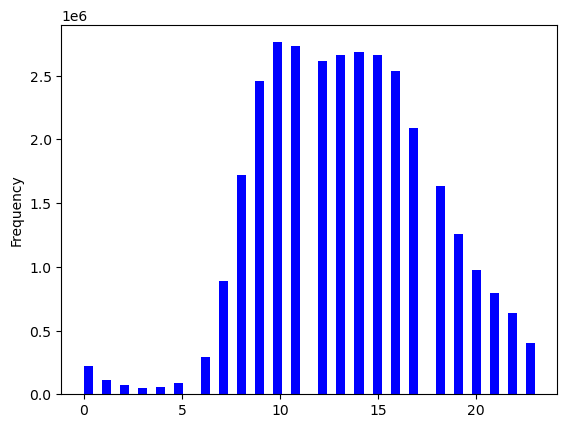

In [20]:
# Create a histogram of the “order_hour_of_day” column

hist = df_complete_data['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

The above histogram represents the hours of the day (0 - 23 hour) and the total amount of orders placed for each hour

In [23]:
#checking the histogram accuracy
df_complete_data['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column¶

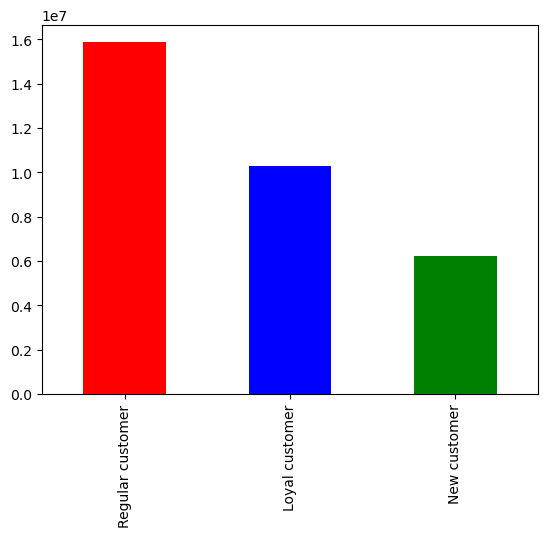

In [24]:
#plotting bar chart for the loyalty flag
loyalty_bar = df_complete_data['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!

In [25]:
#using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

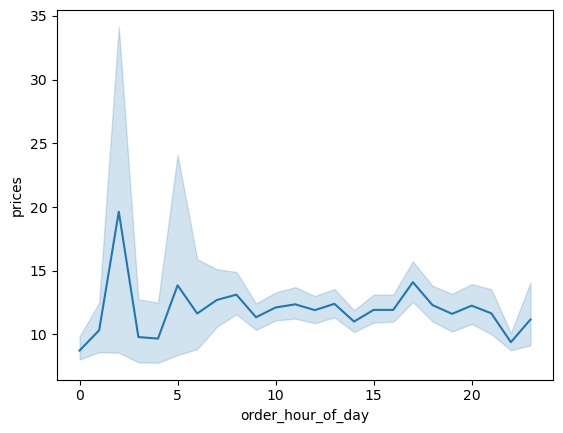

In [26]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

# Determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows

In [27]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'age']]

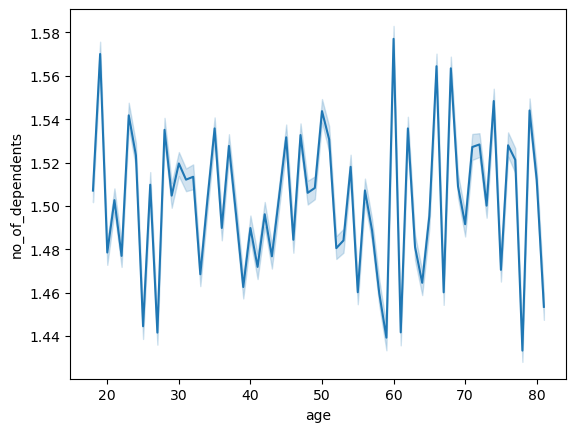

In [28]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'no_of_dependents')

The line chart shows the relationship between customer's age and the number of dependents in each family

# You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [29]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

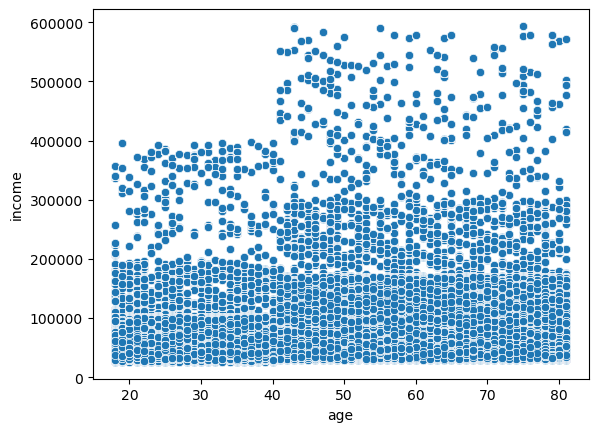

In [30]:
#create scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

The scatterplot shows the relationship between between age and income of instacart customers. Some facts are explitcit from the plot
1. There are massive concetration of customers across all ages that earns up to 200,000 USD.
2. Customers 40 years and olders are earning more (up to 600,000 USD).¶
3. Therefore, it can be concluded that instacart customers 40 years and above have ability to spend more base on their higher income earnings.

# 9. Export your visualizations as “.png” files in your relevant project folder.

In [37]:
# Exporting charts to folder as image
bar.figure.savefig(os.path.join(path, '04 analysis', 'bar_orders_day_of_week.png'))

In [38]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'hist_exp.png'))

In [40]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'exp_hour_of_day.png'))

In [43]:
splot.figure.savefig(os.path.join(path, '04 Analysis', 'scatter_prices.png'))

In [44]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'line_dow_prices.png'))

In [45]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'bar_loyalty_flag.png'))

In [46]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'line_hour_prices.png'))

In [47]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'line_age_no_of_dependants.png'))

In [49]:
plot_spending.figure.savefig(os.path.join(path, '04 Analysis', 'age_income.png'))